### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [24]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [5]:
head(ny)
nrow(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


[1] 54770

In [7]:
head(wash)
nrow(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


[1] 89051

In [6]:
head(chi)
nrow(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


[1] 8630

### Question 1


**What is the most common start station in each city**

In [6]:
# helper function
getMostCommonSS <- function(x) {
  # The summary function when applied to a factor variable gives the count (in descending order) of each category (level) in the factor
    ss <- summary(as.factor(x))
    return(ss)
}


# Get the most common start station in each city
NY.SS <- getMostCommonSS(ny$Start.Station)
wash.SS <- getMostCommonSS(wash$Start.Station)
chi.SS <- getMostCommonSS(chi$Start.Station)

# The first value in each variable generated is the most common group or category
print("Most common start station in NY")
head(NY.SS, 1)
print("Most common start station in Washington")
head(wash.SS, 1)
print("Most common start station in Chicago")
head(chi.SS, 1)

[1] "Most common start station in NY"


Pershing Square North 
                  592

[1] "Most common start station in Washington"


Columbus Circle / Union Station 
                           1700

[1] "Most common start station in Chicago"


Streeter Dr & Grand Ave 
                    210

In [16]:
library(ggplot2)
# a helper function that plots the top N start stations in each city
# SS is a named vector that holds the count of each start stations
plotTopN <- function(SS, city, n) {
  
  # convert the named integers to a dataframe
  df <- data.frame(station=names(SS), SS)
  
  # remove the rownames generated by the data.frame function
  rownames(df) <- NULL
  
  ggplot(df[1:n, ], 
         aes(x=reorder(station, SS), y=SS, label=SS, fill=station, color=station)) + 
    geom_col() +
    # push the data lavbels to the top of the bars and make them black
    geom_text(nudge_y = 1, color="black") +
    labs(title = paste("Top", n, "start stations in", city), 
         x="Start station", y="count") + theme_bw() +
    # rotate the axis text by 90 degrees; also make the plot horizontal
    theme(axis.text.x = element_text(angle = 90), legend.position = "none") + coord_flip()
  
}


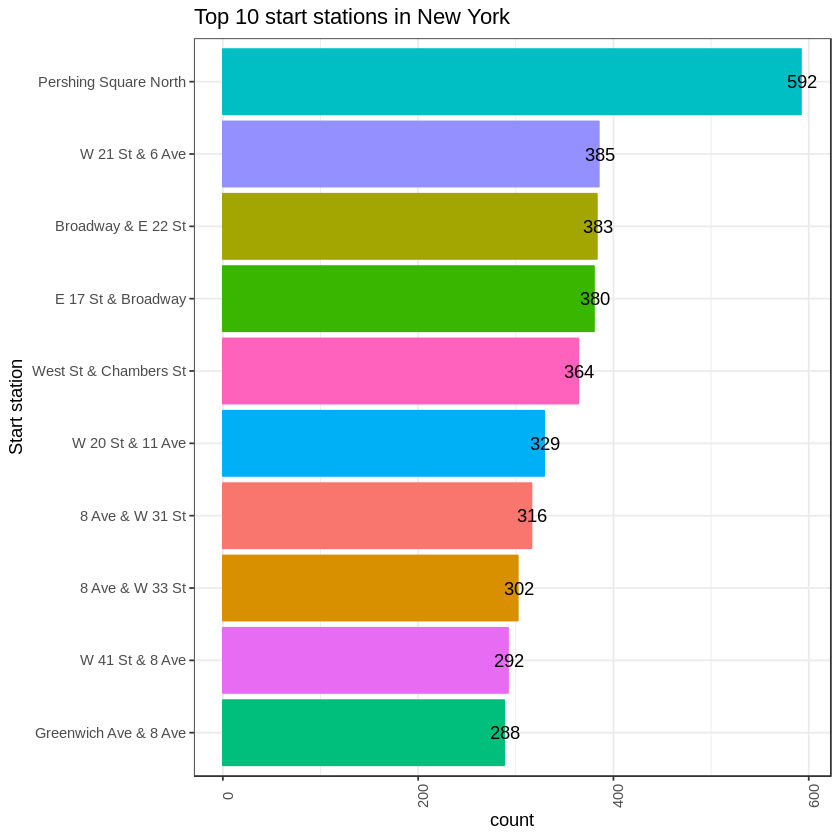

In [17]:
# print the top 10 start stations in New York city
plotTopN(NY.SS, "New York", 10)

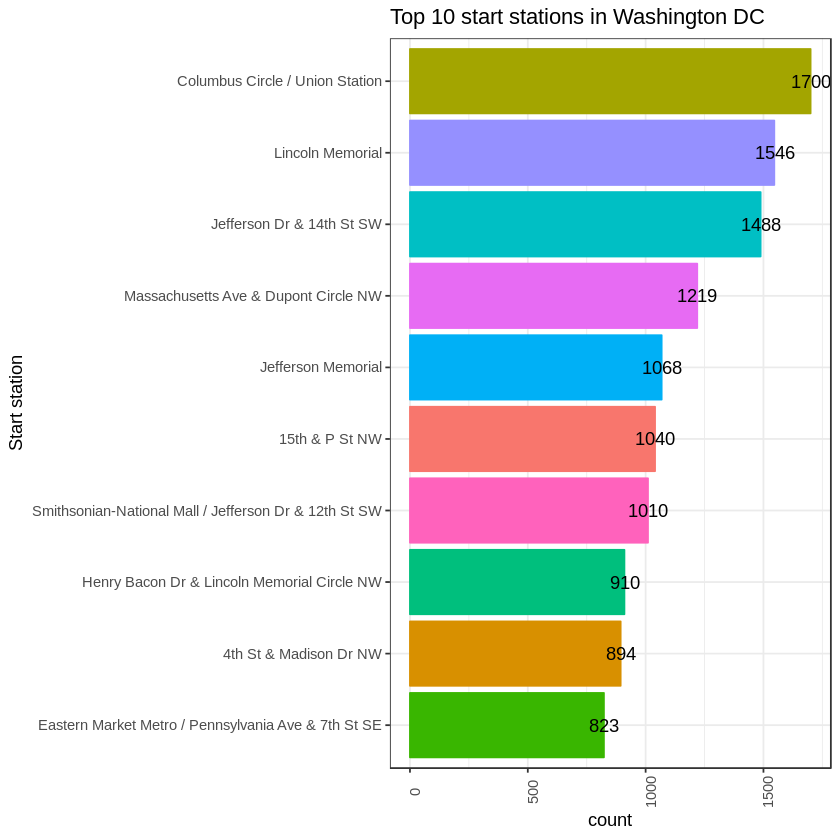

In [9]:
# print the top 10 start stations in Washington
plotTopN(wash.SS, "Washington DC", 10)

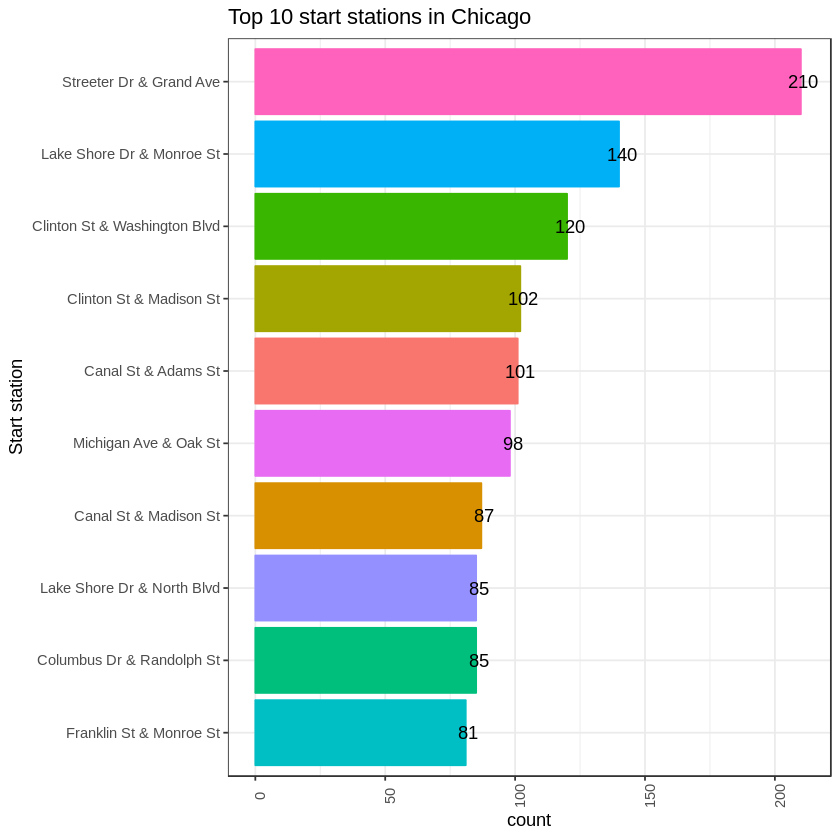

In [10]:
# print the top 10 start stations in Chicago
plotTopN(chi.SS, "Chicago", 10)

**Based on the counts of each start station in each city, the most common start station in New york, Washinton DC and Chicago is Pershing Square North, Columbus Circle / Union Station and Streeter Dr & Grand Ave respectively. See the plots above for actual values.**

### Question 2

**What is the most common ride month in each city?**

In [25]:
# A function that separate the Start.Time column of a dataframe.
# The generated column includes start_date, start_month_name (e.g. June), start_month (e.g. 06), start_day and start_year 
addStartMonth <- function(df) {
  
    #convert to date (format: YYYY-MM-DD)
    df$start_date <- as.Date(df$Start.Time)

    # get the full name of the month e.g July
    df$start_month_name <- months(df$start_date, FALSE)

    # replace the year and month part of the date with an empty string
    df$start_day <- sub("\\d{4}-\\d{2}-", "", df$start_date)
    
    # remove the month and day part
    df$start_year <- sub("-\\d{2}-.*", "", df$start_date)
    
    # remove the year and day parts
    df$start_month <- sub("-\\d{2}", "", sub("\\d{4}-", "", df$start_date))
  
  return(df)
}


ny2 <- addStartMonth(ny)
wash2 <- addStartMonth(wash)
chi2 <- addStartMonth(chi)

levels <- c("January", "February", "March", "April", "May", "June")

# get the counts of the ride months in each city
NY.month_counts <- summary(factor(ny2$start_month_name, levels=levels))
wash.month_counts <- summary(factor(wash2$start_month_name, levels=levels))
chi.month_counts <- summary(factor(chi2$start_month_name, levels=levels))

# display the results
NY.month_counts
wash.month_counts  # the NA does not matter in this case
chi.month_counts

January February    March    April      May     June 
    5745     6364     5820    10661    12180    14000

January February    March    April      May     June     NA's 
    8946    11563    12612    18522    17072    20335        1

January February    March    April      May     June 
     650      930      803     1526     1905     2816

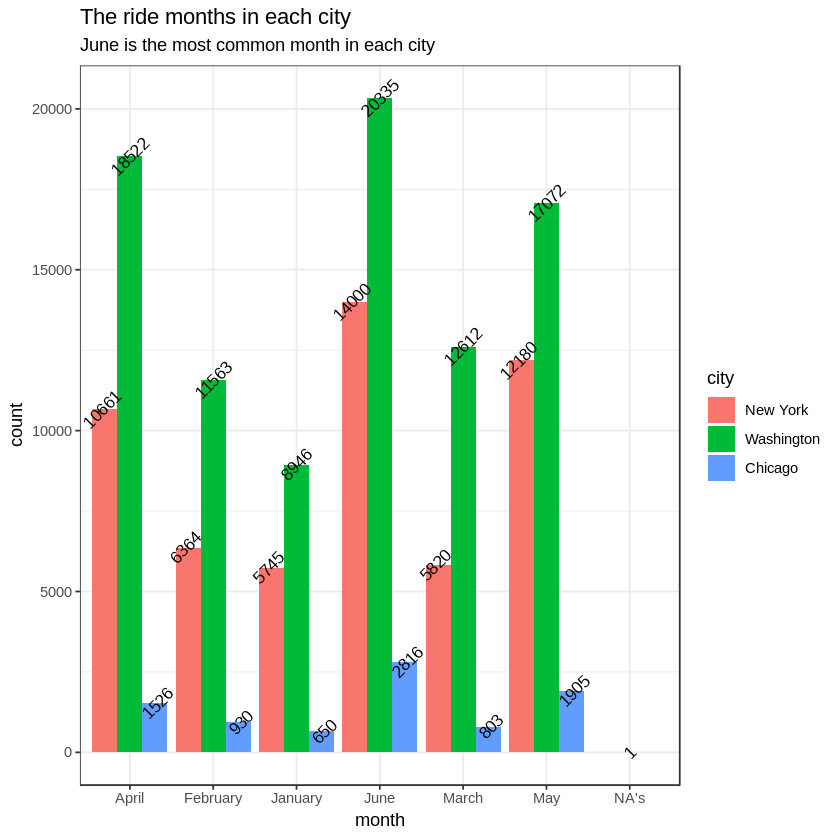

In [26]:
# Creating a plot to compare the months side by side

# convert the counts to a dataframe
df_ny_mnth <- data.frame(month=names(NY.month_counts), count=NY.month_counts, city="New York")
df_wash_mnth <- data.frame(month=names(wash.month_counts), count=wash.month_counts, city="Washington")
df_chi_mnth <- data.frame(month=names(chi.month_counts), count=chi.month_counts, city="Chicago")

# combine all to a single dataset
df_all_mnth <- rbind(df_ny_mnth, df_wash_mnth, df_chi_mnth)

# remove the rownames of the dataset
rownames(df_all_mnth) <- NULL

# create the plot
ggplot(df_all_mnth, aes(x=month, y=count, fill=city, label=count)) + 
  # put the bars side by side
  geom_col(position = position_dodge()) +
  # tilt the data labels to angle of 45 degrees to avoid overlapping
  geom_text(position = position_dodge(width = 1), size=3.5, angle=45) + 
  theme_bw() +
  ggtitle("The ride months in each city", 
          subtitle = "June is the most common month in each city")

**In each city, most of the bike rides occurred in June**

### Question 3

**What are the counts of each user type?**

In [29]:
# taking a different approach; I could have done same for the questions above

# identify the user type in each city
unique(ny$User.Type)
unique(chi$User.Type)
unique(wash$User.Type)

# identify and combine the datasets
ny$city <- "New York"
chi$city <- "Chicago"
wash$city <- "Washington"

# select only the columns found in washington dataset, so we can combine all datasets without errors
df_all <- rbind(ny[names(wash)], chi[names(wash)], wash)

# summary statistics (count) of user type
by(as.factor(df_all$User.Type), df_all$city, summary)

[1] Subscriber Customer             
Levels:  Customer Subscriber

[1] Subscriber Customer             
Levels:  Customer Subscriber

[1] Subscriber Customer             
Levels:  Customer Subscriber

df_all$city: Chicago
             Customer Subscriber 
         1       1746       6883 
------------------------------------------------------------ 
df_all$city: New York
             Customer Subscriber 
       119       5558      49093 
------------------------------------------------------------ 
df_all$city: Washington
             Customer Subscriber 
         1      23450      65600 

[1] 121

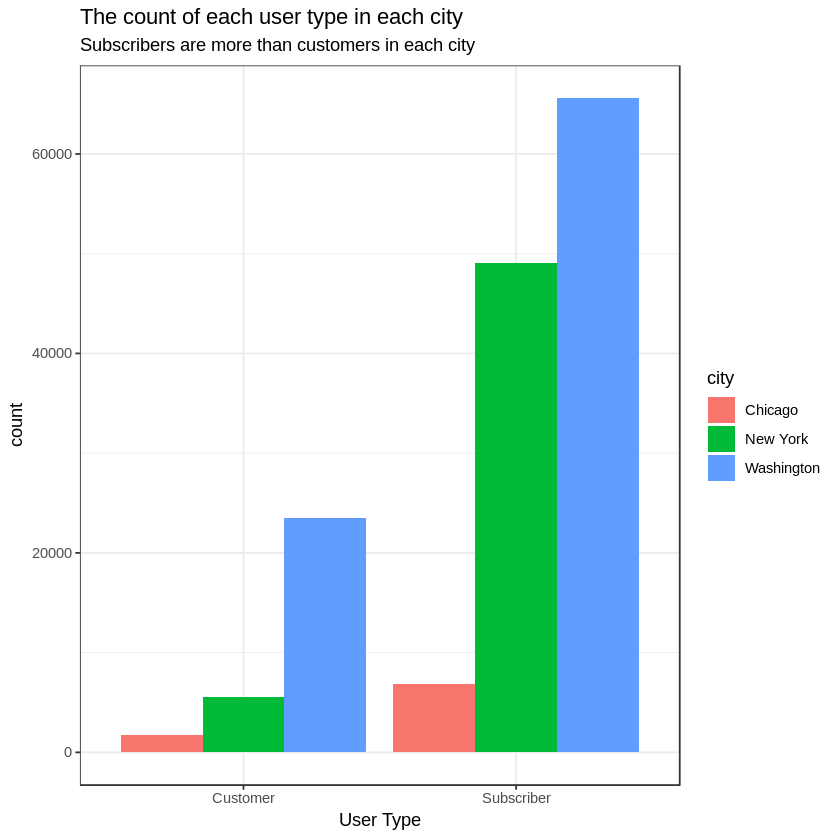

In [28]:
# plotting

# Doing some cleanup

# check the number of rows where user type is an empty string ""
nrow(df_all[which(df_all$User.Type == ""), ])

# remove the rows with empty string or select the rows where the user.type is not empty
df_all <- subset(df_all, df_all$User.Type != "")


# create the plot
ggplot(df_all, aes(x=User.Type, fill=city)) + 
  geom_bar(position = position_dodge()) +
  theme_bw() +
  ggtitle("The count of each user type in each city", 
          subtitle = "Subscribers are more than customers in each city") +
  xlab("User Type")

**Chicago had 1746 (20.2%) Customers and 6883 (79.8%) Subscribers, New York had 5558 (10.2%) Customers and 49093 (89.8%) Subscribers while Washington had 23450 (26.3%) Customers and 65600 (73.7%) Subscribers.**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')